# normal, pneumonia and TB xray image classification

In this kernenl we use transfer learning with vgg16 model and train our own model for performing the classification

In [1]:
# Author: SubrataSarkar32
# project: normal, pneumonia and TB xray image classification


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm

from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
seed = 333
np.random.seed(seed)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/chest-xray-pneumonia/chest_xray/chest_xray"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


['test', 'train', 'val', '.DS_Store']


In [2]:
'''kbase = os.listdir("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png")
kbase1 = os.listdir("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings")
for filet in kbase1:
    f = open("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings/"+filet, 'r')
    file_contents = f.read()
    file_con_list = file_contents.split("\n")
    file_con_list = file_con_list[-1]
    print(file_con_list)
imle = cv2.imread("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0507_1.png")
plt.imshow(imle)
plt.show()'''

'kbase = os.listdir("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png")\nkbase1 = os.listdir("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings")\nfor filet in kbase1:\n    f = open("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings/"+filet, \'r\')\n    file_contents = f.read()\n    file_con_list = file_contents.split("\n")\n    file_con_list = file_con_list[-1]\n    print(file_con_list)\nimle = cv2.imread("../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/CXR_png/CHNCXR_0507_1.png")\nplt.imshow(imle)\nplt.show()'

In [3]:
#path to images
img_dir = "../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles"
data_dir2 = "../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings"
img_dir2 = "../input/chest-xray-pneumonia/chest_xray/chest_xray"

#list all available images type
#print(os.listdir(img_dir))
#print(os.listdir(data_dir2))

# function to load dataset

In [4]:
def load_data(img_dir,data_dir2,img_dir2):
    X = []
    y = []
    labels = []
    idx = 0
    for i,folder_name in enumerate(os.listdir(img_dir)):
        if folder_name in ( "CXR_png"):
            for file_name in tqdm(os.listdir(f'{img_dir}/{folder_name}')):
                if file_name.endswith('png'):
                    #print(file_name)
                    f = open('../input/pulmonary-chest-xray-abnormalities/ChinaSet_AllFiles/ChinaSet_AllFiles/ClinicalReadings/'+file_name[:-4]+'.txt', 'r')
                    file_contents = f.read()
                    file_con_list = file_contents.split("\n")
                    file_con_list = file_con_list[-1]
                    if "TB" in file_con_list:
                        file_con_list = "TB"
                    elif "normal" in file_con_list:
                        file_con_list = "normal"
                    #print (file_con_list)
                    if file_con_list not in labels:
                        labels.append(file_con_list)
                    im = cv2.imread(f'{img_dir}/{folder_name}/{file_name}')
                    if im is not None:
                        im = cv2.resize(im, (100, 100))
                        X.append(im)
                        y.append(labels.index(file_con_list))
                        
    for i,folder_name in enumerate(['test', 'train', 'val']):
        #here we get validation and train
        for j,folder_name1 in enumerate(os.listdir(os.path.join(img_dir2,folder_name))):
            if folder_name1 in ( "PNEUMONIA","NORMAL"):
                if folder_name1.lower() not in labels:
                    labels.append(folder_name1.lower())
                for file_name in tqdm(os.listdir(f'{img_dir2}/{folder_name}/{folder_name1}')):
                    if file_name.endswith('jpeg'):
                        im = cv2.imread(f'{img_dir2}/{folder_name}/{folder_name1}/{file_name}')
                    if im is not None:
                        im = cv2.resize(im, (100, 100))
                        X.append(im)
                        y.append(labels.index(folder_name1.lower()))

    
    X = np.asarray(X)
    y = np.asarray(y)
    labels = np.asarray(labels)
    return X,y,labels

def load_data1(img_dir2):
    X = []
    y = []
    labels = []
    idx = 2
    for i,folder_name in enumerate(os.listdir(img_dir2)):
        #here we get validation and train
        for j,folder_name1 in enumerate(os.listdir(os.path.join(img_dir2,folder_name))):
            if folder_name1 in ( "humans"):
                if folder_name1 not in labels:
                    labels.append(folder_name)
                for file_name in tqdm(os.listdir(f'{img_dir2}/{folder_name}/{folder_name1}')):
                    if file_name.endswith('png'):
                        im = cv2.imread(f'{img_dir2}/{folder_name}/{folder_name1}/{file_name}')
                    if im is not None:
                        im = cv2.resize(im, (100, 100))
                        X.append(im)
                        y.append(idx)
            
    
    X = np.asarray(X)
    y = np.asarray(y)
    labels = np.asarray(labels)
    return X,y,labels

# Load dataset

In [5]:
X,y,labels = load_data(img_dir,data_dir2,img_dir2)
#X1,y1,labels1 = load_data1(img_dir2)
#X,y,labels = X2,y2,labels1+labels2

100%|██████████| 9/9 [00:00<00:00, 59.33it/s]


# Reshape array

In [6]:
#fix y
y = y.reshape(-1,1)


In [7]:
'''for i,_ in enumerate(y):
    if y[i] == 1:
        y[i]=0
    elif y[i] == 2:
        pass
    else:
        y[i]=1
'''
print(y[0])

[0]


# split data into train and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
train_img = X_train
train_labels = y_train
test_img = X_test
test_labels = y_test
train_img.shape, train_labels.shape, test_img.shape, test_labels.shape

((5217, 100, 100, 3), (5217, 1), (1305, 100, 100, 3), (1305, 1))

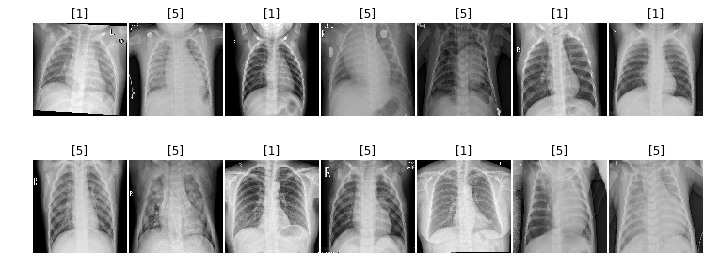

['TB' 'normal' 'tuberculosis pleuritis' '' 'right upper pneumonia \t'
 'pneumonia']


In [10]:
#show random samples
rand_14 = np.random.randint(0, train_img.shape[0],14)
sample_img = train_img[rand_14]
sample_labels = train_labels[rand_14]
num_rows, num_cols = 2, 7
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.01})
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 7 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_img[image_index])
        ax[r,c].set_title('%s' % sample_labels[image_index])
plt.show()
plt.close()
print(labels)

In [11]:
#one-hot-encode the labels
num_classes = len(labels)
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
train_labels_cat.shape, test_labels_cat.shape

((5217, 6), (1305, 6))

In [12]:
# re-shape the images data
train_data = train_img
test_data = test_img
train_data.shape, test_data.shape

((5217, 100, 100, 3), (1305, 100, 100, 3))

In [13]:
# shuffle the training dataset & set aside val_perc % of rows as validation data
for _ in range(5): 
    indexes = np.random.permutation(len(train_data))

# randomly sorted!
train_data = train_data[indexes]
train_labels_cat = train_labels_cat[indexes]

# now we will set-aside val_perc% of the train_data/labels as cross-validation sets
val_perc = 0.10
val_count = int(val_perc * len(train_data))
print(val_count)

# first pick validation set
val_data = train_data[:val_count,:]
val_labels_cat = train_labels_cat[:val_count,:]

# leave rest in training set
train_data2 = train_data[val_count:,:]
train_labels_cat2 = train_labels_cat[val_count:,:]

train_data2.shape, train_labels_cat2.shape, val_data.shape, val_labels_cat.shape, test_data.shape, test_labels_cat.shape

521


((4696, 100, 100, 3),
 (4696, 6),
 (521, 100, 100, 3),
 (521, 6),
 (1305, 100, 100, 3),
 (1305, 6))

In [14]:
# a utility function that plots the losses and accuracies for training & validation sets across our epochs
def show_plots(history):
    """ Useful function to view plot of loss values & accuracies across the various epochs """
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['acc'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle=' ', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['acc']
    val_acc_vals = history['val_acc']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls=' ', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()
    
    # delete locals from heap before exiting
    del loss_vals, val_loss_vals, epochs, acc_vals, val_acc_vals

In [15]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time
    
    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN
    
    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)
    
    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [16]:
def get_commonname(idx):
    sciname = labels[idx]
    return sciname
    

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


import numpy as np
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,Activation,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from PIL import Image

In [18]:
#data augmentation
datagen = ImageDataGenerator(
        rotation_range=30,
        zoom_range = 0.25,  
        width_shift_range=0.1, 
        height_shift_range=0.1)
# datagen = ImageDataGenerator(
#     rotation_range=8,
#     shear_range=0.3,
#     zoom_range = 0.08,
#     width_shift_range=0.08,
#     height_shift_range=0.08)

In [19]:
#create multiple cnn model for ensembling
#model 1
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (100, 100, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Conv2D(256, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# use adam optimizer and categorical cross entropy cost
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
# after each epoch decrease learning rate by 0.95
annealer = LearningRateScheduler(lambda x: 2e-3 * 0.55 ** x)

# train
epochs = 50
j=0
start_time = time.time()
history = model.fit_generator(datagen.flow(train_data2, train_labels_cat2, batch_size=64),epochs = epochs, steps_per_epoch = train_data2.shape[0]/64,validation_data = (val_data, val_labels_cat), callbacks=[annealer], verbose=1)
end_time = time.time()
print_time_taken(start_time, end_time)


print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(j+1,epochs,history.history['acc'][epochs-1],history.history['val_acc'][epochs-1]))

Epoch 1/50
74/73 [==============================] - 15s 209ms/step - loss: 1.1944 - acc: 0.7301 - val_loss: 7.7073 - val_acc: 0.4203
Epoch 2/50
74/73 [==============================] - 10s 134ms/step - loss: 0.6996 - acc: 0.8018 - val_loss: 4.6064 - val_acc: 0.3474
Epoch 3/50
74/73 [==============================] - 10s 139ms/step - loss: 0.5318 - acc: 0.8173 - val_loss: 1.7017 - val_acc: 0.5144
Epoch 4/50
74/73 [==============================] - 10s 138ms/step - loss: 0.4706 - acc: 0.8331 - val_loss: 0.5800 - val_acc: 0.7678
Epoch 5/50
74/73 [==============================] - 10s 137ms/step - loss: 0.4272 - acc: 0.8488 - val_loss: 0.2904 - val_acc: 0.9002
Epoch 6/50
74/73 [==============================] - 10s 138ms/step - loss: 0.3973 - acc: 0.8557 - val_loss: 0.2961 - val_acc: 0.8752
Epoch 7/50
74/73 [==============================] - 10s 137ms/step - loss: 0.4059 - acc: 0.8565 - val_loss: 0.3093 - val_acc: 0.8733
Epoch 8/50
74/73 [==============================] - 10s 138ms/step - 

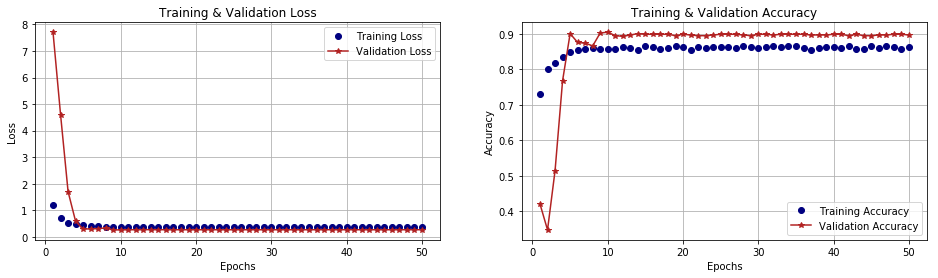

In [21]:
show_plots(history.history)

In [22]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

1305/1305 [==============================] - 0s 362us/step
Test loss: 0.2545 accuracy: 0.9057


# run model on random data

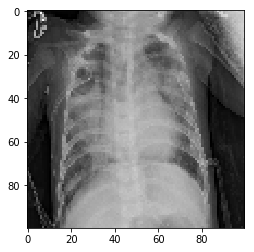

actual: ['pneumonia']
predicted: ['pneumonia']


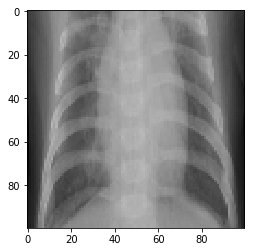

actual: ['pneumonia']
predicted: ['pneumonia']


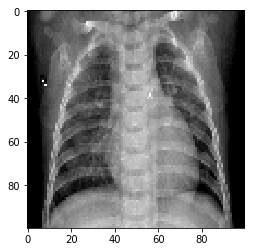

actual: ['pneumonia']
predicted: ['pneumonia']


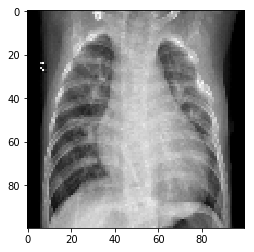

actual: ['pneumonia']
predicted: ['pneumonia']


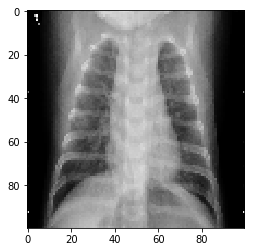

actual: ['pneumonia']
predicted: ['pneumonia']


In [23]:
im_list = [100,13,14,15,851]
for i in im_list:
#     i = 1000  #index from test data to be used, change this other value to see a different image
    img = test_data[i]
    plt.imshow(img)
    plt.show()
    pred = model.predict_classes(img.reshape(-1,100,100,3))
    actual =  test_labels[i]
    print(f'actual: {get_commonname(actual)}')
    print(f'predicted: {get_commonname(pred)}')


# save model
by saving the model we can use it later directly for prediction

In [24]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_4.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_4.h5")

Hope this kernel helped you on gaining insight on transfer learning and will inspire you to come up with innovative ideas to use this model in future